In [1]:
import os
#os.chdir('/home/henri/Documents/')

In [2]:
import tensorflow as tf
import numpy as np
import sys

from magenta.common import tf_lib

In [3]:
#from magenta.models.rl_tuner import rl_tuner
#from magenta.models.rl_tuner import rl_tuner_ops
import rl_tuner
import rl_tuner_ops

In [4]:
# Place to save your model checkpoints and composi
SAVE_PATH = "/home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/"

In [5]:
# Model parameter settings
ALGORITHM = 'q'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = 50000
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [6]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,
                                  store_every_nth=1,
                                  train_every_nth=5,
                                  minibatch_size=32,
                                  discount_rate=0.5,
                                  max_experience=100000,
                                  target_network_update_rate=0.01)

## Train network

In [7]:
reload(rl_tuner_ops)
reload(rl_tuner)
rl_tuner.reload_files()

In [8]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

Retrieving checkpoint of Note RNN from Magenta download server.
INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
INFO:tensorflow:Q network cell: <tensorflow.contrib.rnn.python.ops.core_rnn_cell_impl.MultiRNNCell object at 0x7627190>
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
INFO:tensorflow:Add estimating future rewards portion of graph
INFO:tensorflow:Adding q value prediction portion of graph
INFO:tensorflow:Summary name q_network/rnn/multi_rnn_cell/cell_0/lstm_cell/weights:0 is i

In [9]:
# Generate initial music sequence before training with RL
#rl_net.generate_music_sequence(visualize_probs=True, title='pre_rl2', length=32)

In [10]:
rl_net.train(num_steps=5000, exploration_period=100)

INFO:tensorflow:Evaluating initial model...


rl_tuner_ops.py:136: RuntimeWarning: invalid value encountered in double_scalars
  return (x[lag:] * x[:n - lag]).sum() / float(n) / c0


INFO:tensorflow:Priming with note 7
INFO:tensorflow:Generated sequence: [36, 36, 5, 1, 15, 29, 5, 14, 1, 32, 1, 15, 36, 5, 1, 1, 1, 15, 14, 29, 10, 1, 1, 1, 5, 10, 36, 14, 29, 36, 1, 32]
Generated sequence: [36, 36, 5, 1, 15, 29, 5, 14, 1, 32, 1, 15, 36, 5, 1, 1, 1, 15, 14, 29, 10, 1, 1, 1, 5, 10, 36, 14, 29, 36, 1, 32]
INFO:tensorflow:Wrote a melody to /home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/
INFO:tensorflow:Visualizing note selection probabilities:


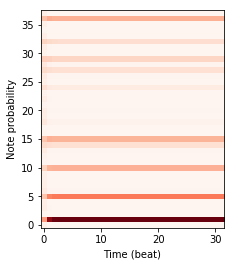

In [11]:
#rl_tuner.DEBUG = True
rl_net.generate_music_sequence(visualize_probs=True, title='brief_training', length=32)
#rl_net.evaluate_model(10)
#rl_tuner.DEBUG = False

# This took from 22:40 - 22:53
- full training is estimated to take 46 minutes

In [11]:
rl_net.train(num_steps=300000, exploration_period=50000)

INFO:tensorflow:Evaluating initial model...
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 50000 steps: -1402144.33584
INFO:tensorflow:		Music theory reward: -1202513.68428
INFO:tensorflow:		Note RNN reward: -199630.651562
Training iteration 50000
	Reward for last 50000 steps: -1402144.33584
		Music theory reward: -1202513.68428
		Note RNN reward: -199630.651562
INFO:tensorflow:	Exploration probability is 0.1
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 100000
INFO:tensorflow:	Reward for last 50000 steps: -451497.176535
INFO:tensorflow:		Music theory reward: -270606.623474
INFO:tensorflow:		Note RNN reward: -180890.553061
Training iteration 100000
	Reward for last 50000 steps: -451497.176535
		Music theory reward: -270606.623474
		Note RNN reward: -180890.553061
INFO:tensorflow:	Exploration probability is 0.1
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 150000
INFO:tensorf

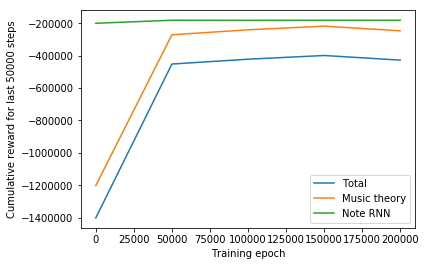

In [12]:
rl_net.plot_rewards()

In [13]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

INFO:tensorflow:Total compositions: 100.0
Total notes:3200.0
	Compositions starting with tonic: 82.0
	Compositions with unique highest note:54.0
	Compositions with unique lowest note:68.0
	Number of resolved leaps:21.0
	Number of double leaps:20.0
	Notes not in key:0.0
	Notes in motif:958.0
	Notes in repeated motif:0.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.82
	Percent compositions with unique highest note:0.54
	Percent compositions with unique lowest note:0.68
	Percent of leaps resolved:0.512195121951
	Percent notes not in key:0.0
	Percent notes in motif:0.299375
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:-0.145541269876
	Average autocorrelation of lag2:-0.295333777964
	Average autocorrelation of lag3:0.334083666191

	Avg. num octave jumps per composition:0.33
	Avg. num sevenths per composition:0.05
	Avg. num fifths per composition:0.35
	Avg. num sixths per composition:0.23
	Avg. 

In [14]:
# rl_net.plot_evaluation()

INFO:tensorflow:Priming with note 5
INFO:tensorflow:Generated sequence: [28, 19, 19, 1, 0, 19, 0, 1, 14, 0, 1, 14, 0, 1, 11, 0, 1, 0, 1, 21, 0, 1, 16, 0, 1, 0, 19, 0, 1, 14, 14, 1]
Generated sequence: [28, 19, 19, 1, 0, 19, 0, 1, 14, 0, 1, 14, 0, 1, 11, 0, 1, 0, 1, 21, 0, 1, 16, 0, 1, 0, 19, 0, 1, 14, 14, 1]
INFO:tensorflow:Wrote a melody to /home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/
INFO:tensorflow:Visualizing note selection probabilities:


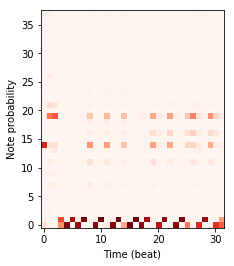

In [15]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_little_rl7-1', length=32)

In [17]:
#rl_tuner.DEBUG = True
#rl_net.evaluate_model(1)
#rl_tuner.DEBUG = False

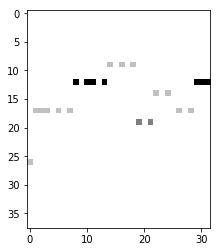

In [16]:
def one_hot(i, n):
    result = np.zeros(n)
    result[i] = 1.0
    return result

melody = [28, 19, 19, 1, 0, 19, 0, 1, 14, 0, 1, 14, 0, 1, 11, 0, 1, 0, 1, 21, 0, 1, 16, 0, 1, 0, 19, 0, 1, 14, 14, 1]
to_plot = []
prev_note = -1
for i, note in enumerate(melody):
    if note > 1:
        prev_note = note - 2
        
    if note == 0:
        to_plot.append(one_hot(0, 38))
    else:
        multiplicity = 50
        if prev_note % 12 == 0: # C
            multiplicity = 200
        elif prev_note % 12 == 4: # E
            multiplicity = 150
        elif prev_note % 12 == 7: # G
            multiplicity = 100
            
        to_plot.append(multiplicity * one_hot(prev_note, 38))

to_plot = 255 - np.transpose(to_plot)
        
import matplotlib.pyplot as plt
plt.imshow(to_plot, cmap='gray', interpolation='nearest')
plt.show()

# Full Training

In [17]:
rl_net.train(num_steps=1000000, exploration_period=500000)

INFO:tensorflow:Evaluating initial model...
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 50000 steps: -2498642.63316
INFO:tensorflow:		Music theory reward: -2135402.33284
INFO:tensorflow:		Note RNN reward: -363240.300324
Training iteration 50000
	Reward for last 50000 steps: -2498642.63316
		Music theory reward: -2135402.33284
		Note RNN reward: -363240.300324
INFO:tensorflow:	Exploration probability is 0.9042382
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 100000
INFO:tensorflow:	Reward for last 50000 steps: -1769543.69093
INFO:tensorflow:		Music theory reward: -1587682.35089
INFO:tensorflow:		Note RNN reward: -181861.340045
Training iteration 100000
	Reward for last 50000 steps: -1769543.69093
		Music theory reward: -1587682.35089
		Note RNN reward: -181861.340045
INFO:tensorflow:	Exploration probability is 0.8084782
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 150000


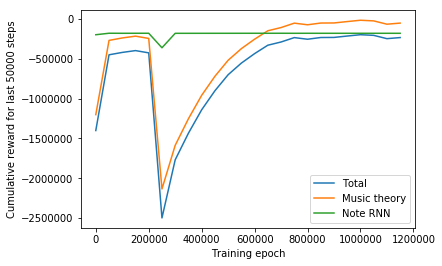

In [18]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

In [19]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
#rl_net.plot_evaluation()

INFO:tensorflow:Priming with note 5
INFO:tensorflow:Generated sequence: [14, 9, 11, 1, 1, 1, 9, 4, 6, 1, 6, 13, 1, 18, 0, 0, 13, 14, 19, 16, 1, 13, 1, 23, 26, 1, 1, 1, 25, 1, 26, 23]
Generated sequence: [14, 9, 11, 1, 1, 1, 9, 4, 6, 1, 6, 13, 1, 18, 0, 0, 13, 14, 19, 16, 1, 13, 1, 23, 26, 1, 1, 1, 25, 1, 26, 23]
INFO:tensorflow:Wrote a melody to /home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/
INFO:tensorflow:Visualizing note selection probabilities:


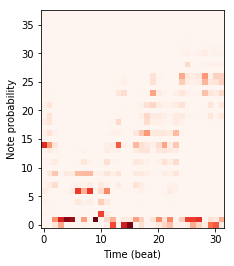

In [25]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_rl7-5')

In [51]:
# If you're happy with the model, save a version!
rl_net.save_model(SAVE_PATH, 'their_model')

In [43]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

INFO:tensorflow:Total compositions: 100.0
Total notes:3200.0
	Compositions starting with tonic: 51.0
	Compositions with unique highest note:75.0
	Compositions with unique lowest note:43.0
	Number of resolved leaps:133.0
	Number of double leaps:51.0
	Notes not in key:489.0
	Notes in motif:2491.0
	Notes in repeated motif:0.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.51
	Percent compositions with unique highest note:0.75
	Percent compositions with unique lowest note:0.43
	Percent of leaps resolved:0.722826086957
	Percent notes not in key:0.1528125
	Percent notes in motif:0.7784375
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:0.234460036411
	Average autocorrelation of lag2:0.140511755453
	Average autocorrelation of lag3:0.117044649122

	Avg. num octave jumps per composition:0.26
	Avg. num sevenths per composition:0.28
	Avg. num fifths per composition:0.54
	Avg. num sixths per composition:1.

# Check that you can restore
- currently doesn't work

In [16]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
INFO:tensorflow:Q network cell: <tensorflow.contrib.rnn.python.ops.core_rnn_cell_impl.MultiRNNCell object at 0xc20aa50>
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
INFO:tensorflow:Add estimating future rewards portion of graph
INFO:tensorflow:Adding q value prediction portion of graph
INFO:tensorflow:Summary name q_network/rnn/multi_rnn_cell/cell_0/lstm_cell/weights:0 is illegal; using q_network/rnn/multi_rnn_cell/cell_0/lstm_cell/weig

NotFoundError: Key rnn_model/rnn/multi_rnn_cell/cell_0/lstm_cell/weights not found in checkpoint
	 [[Node: save_1/RestoreV2_3 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/RestoreV2_3/tensor_names, save_1/RestoreV2_3/shape_and_slices)]]

Caused by op u'save_1/RestoreV2_3', defined at:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-37b389a54f3b>", line 8, in <module>
    note_rnn_checkpoint_file="/home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/test_model.ckpt")
  File "rl_tuner.py", line 236, in __init__
    self.initialize_internal_models_graph_session()
  File "rl_tuner.py", line 300, in initialize_internal_models_graph_session
    self.q_network.initialize_and_restore(self.session)
  File "note_rnn_loader.py", line 142, in initialize_and_restore
    self.restore_vars_from_checkpoint(self.checkpoint_dir)
  File "note_rnn_loader.py", line 274, in restore_vars_from_checkpoint
    saver = tf.train.Saver(var_list=var_dict)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1051, in __init__
    self.build()
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1081, in build
    restore_sequentially=self._restore_sequentially)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 675, in build
    restore_sequentially, reshape)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 402, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 242, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 668, in restore_v2
    dtypes=dtypes, name=name)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/henri/venvs/magentavenv/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key rnn_model/rnn/multi_rnn_cell/cell_0/lstm_cell/weights not found in checkpoint
	 [[Node: save_1/RestoreV2_3 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/RestoreV2_3/tensor_names, save_1/RestoreV2_3/shape_and_slices)]]


In [14]:
rl_net.save_model('test_model.ckpt', directory=SAVE_PATH)

INFO:tensorflow:Priming with note 25
INFO:tensorflow:Generated sequence: [6, 24, 0, 30, 2, 17, 6, 37, 35, 1, 1, 32, 35, 5, 20, 24, 12, 3, 23, 29, 10, 29, 19, 8, 20, 19, 20, 21, 1, 34, 6, 7]
Generated sequence: [6, 24, 0, 30, 2, 17, 6, 37, 35, 1, 1, 32, 35, 5, 20, 24, 12, 3, 23, 29, 10, 29, 19, 8, 20, 19, 20, 21, 1, 34, 6, 7]
INFO:tensorflow:Wrote a melody to /home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/
INFO:tensorflow:Visualizing note selection probabilities:


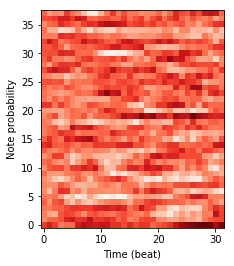

In [49]:
rl_net.generate_music_sequence(visualize_probs=True, title='test')

In [50]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

INFO:tensorflow:Total compositions: 100.0
Total notes:3200.0
	Compositions starting with tonic: 5.0
	Compositions with unique highest note:72.0
	Compositions with unique lowest note:61.0
	Number of resolved leaps:4.0
	Number of double leaps:186.0
	Notes not in key:1254.0
	Notes in motif:2500.0
	Notes in repeated motif:0.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.05
	Percent compositions with unique highest note:0.72
	Percent compositions with unique lowest note:0.61
	Percent of leaps resolved:0.0210526315789
	Percent notes not in key:0.391875
	Percent notes in motif:0.78125
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:-0.0216135577138
	Average autocorrelation of lag2:-0.0260634926946
	Average autocorrelation of lag3:-0.053052280602

	Avg. num octave jumps per composition:12.4
	Avg. num sevenths per composition:0.97
	Avg. num fifths per composition:1.14
	Avg. num sixths per composition: